http://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html#equals-signs

In [1]:
from sympy import *

In [2]:
>>> x = symbols('x')
>>> x + 1

x + 1

In [3]:
>>> x, y, z = symbols('x y z')

In [4]:
>>> a, b = symbols('b a')
>>> a

b

In [5]:
>>> b
a

b

In [6]:
>>> crazy = symbols('unrelated')
>>> crazy + 1

unrelated + 1

In [7]:
>>> x = symbols('x')
>>> expr = x + 1
>>> x = 2
>>> print(expr)

x + 1


In [8]:
>>> x = 'abc'
>>> expr = x + 'def'
>>> expr

'abcdef'

In [9]:
>>> x = 'ABC'
>>> expr

'abcdef'

Quick Tip

To change the value of a Symbol in an expression, use subs

In [10]:
>>> x = symbols('x')
>>> expr = x + 1
>>> expr.subs(x, 2)

3

# Equals signs

Instead of treating x + 1 == 4 symbolically, we just got False. In SymPy, == represents exact structural equality testing. This means that a == b means that we are asking if a=b. We always get a bool as the result of ==. There is a separate object, called Eq, which can be used to create symbolic equalities

In [11]:
>>> x + 1 == 4

False

In [12]:
>>> Eq(x + 1, 4)

Eq(x + 1, 4)

In [13]:
(x + 1)**2 == x**2 + 2*x + 1

False

In [14]:
>>> a = (x + 1)**2
>>> b = x**2 + 2*x + 1
>>> simplify(a - b)

0

In [15]:
>>> a = (x + 1)**2
>>> b = x**2 + 2*x + 1
a.equals(b)

True

In [16]:
>>> c = x**2 - 2*x + 1
>>> simplify(a - c)

4*x

In [17]:
>>> a = cos(x)**2 - sin(x)**2
>>> b = cos(2*x)
>>> a.equals(b)

True

# Two Final Notes: ^ and /
You may have noticed that we have been using ** for exponentiation instead of the standard ^. That’s because SymPy follows Python’s conventions. In Python, ^ represents logical exclusive or. SymPy follows this convention:

In [18]:
>>> True ^ False

True

In [19]:
>>> True ^ True

False

In [20]:
>>> x^y

x ^ y

In [21]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [22]:
>>> type(1 + 1)

int

In [23]:
Integer(1)/Integer(3)

1/3

In [24]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

In [25]:
>>> from __future__ import division
>>> 1/2 

0.5

In [26]:
>>> Rational(1, 2)

1/2

In [27]:
>>> x + 1/2 

x + 0.5

In [28]:
>>> from sympy import *
>>> x, y, z = symbols("x y z")

In [29]:
>>> expr = cos(x) + 1
>>> expr.subs(x, y)

cos(y) + 1

In [30]:
>>> expr.subs(x, 0)

2

In [31]:
>>> expr = x**y
>>> expr

x**y

In [32]:
>>> expr = expr.subs(y, x**y)
>>> expr

x**(x**y)

In [33]:
>>> expr = expr.subs(y, x**x)
>>> expr

x**(x**(x**x))

In [34]:
>>> expr = sin(2*x) + cos(2*x)
>>> expand_trig(expr)

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

In [35]:
>>> expr.subs(sin(2*x), 2*sin(x)*cos(x))

2*sin(x)*cos(x) + cos(2*x)

In [36]:
>>> expr = cos(x)
>>> expr.subs(x, 0)

1

In [37]:
expr

cos(x)

In [38]:
x

x

In [39]:
>>> expr = x**3 + 4*x*y - z
>>> expr.subs([(x, 2), (y, 4), (z, 0)])

40

In [40]:
>>> expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
>>> replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
>>> expr.subs(replacements)

-4*x**3 - 2*x + y**4 + 4*y**2 + 3

In [41]:
expr

x**4 - 4*x**3 + 4*x**2 - 2*x + 3

In [42]:
>>> str_expr = "x**2 + 3*x - 1/2"
>>> expr = sympify(str_expr)
>>> expr

x**2 + 3*x - 1/2

In [43]:
>>> expr.subs(x, 2)

19/2

# evalf
To evaluate a numerical expression into a floating point number, use evalf.

In [44]:
>>> expr = sqrt(8)
>>> expr.evalf()

2.82842712474619

In [45]:
expr.evalf(4)

2.828

SymPy can evaluate floating point expressions to arbitrary precision. By default, 15 digits of precision are used, but you can pass any number as the argument to evalf. Let’s compute the first 100 digits of π.

In [46]:
pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [47]:
>>> expr = cos(2*x)
>>> expr.evalf(subs={x: 2.4})

0.0874989834394464

Sometimes there are roundoff errors smaller than the desired precision that remain after an expression is evaluated. Such numbers can be removed at the user’s discretion by setting the chop flag to True.

In [48]:
>>> one = cos(1)**2 + sin(1)**2
>>> (one - 1).evalf()

-0.e-124

In [49]:
>>> (one - 1).evalf(chop=True)

0

# lambdify
subs and evalf are good if you want to do simple evaluation, but if you intend to evaluate an expression at many points, there are more efficient ways. For example, if you wanted to evaluate an expression at a thousand points, using SymPy would be far slower than it needs to be, especially if you only care about machine precision. Instead, you should use libraries like NumPy and SciPy.

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the lambdify function. lambdify acts like a lambda function, except it converts the SymPy names to the names of the given numerical library, usually NumPy. For example

In [50]:
>>> import numpy 
>>> a = numpy.arange(50) 
>>> expr = sin(x)
>>> f = lambdify(x, expr, "numpy") 
>>> f(a) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265])

In [51]:
>>> def mysin(x):
...     """
...     My sine. Note that this is only accurate for small x.
...     """
...     return x
>>> f = lambdify(x, expr, {"sin":mysin})
>>> f(0.1)

0.1

In [52]:
>>> from sympy import *
>>> x, y, z = symbols('x y z')
>>> init_printing(use_unicode=True)

In [53]:
simplify(sin(x)**2 + cos(x)**2)

In [54]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [55]:
simplify(x**2 + 2*x + 1)

In [56]:
>>> expand((x + 1)**2)

In [57]:
>>> expand((x + 2)*(x - 3))

In [58]:
>>> expand((x + 1)*(x - 2) - (x - 1)*x)

In [59]:
>>> factor(x**3 - x**2 + x - 1)

In [60]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [61]:
factor(x**2 + 2*x + 1)

In [62]:
>>> factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [63]:
>>> expand((cos(x) + sin(x))**2)

In [64]:
>>> factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

In [65]:
>>> expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
>>> expr

In [66]:
>>> collected_expr = collect(expr, x)
>>> collected_expr

In [67]:
>>> collected_expr.coeff(x, 2)

In [68]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

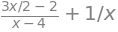

In [69]:
>>> expr = 1/x + (3*x/2 - 2)/(x - 4)
>>> expr

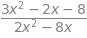

In [70]:
>>> cancel(expr)

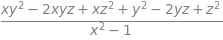

In [71]:
>>> expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
>>> expr

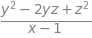

In [72]:
>>> cancel(expr)

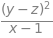

In [73]:
>>> factor(expr)

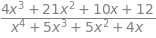

In [74]:
>>> expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
>>> expr

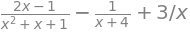

In [75]:
>>> apart(expr)

In [76]:
>>> acos(x)

In [77]:
>>> cos(acos(x))

In [78]:
>>> asin(1)

In [79]:
>>> trigsimp(sin(x)**2 + cos(x)**2)

In [80]:
>>> trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [81]:
>>> trigsimp(sin(x)*tan(x)/sec(x))

In [82]:
>>> trigsimp(cosh(x)**2 + sinh(x)**2)

In [83]:
>>> trigsimp(sinh(x)/tanh(x))

In [84]:
>>> expand_trig(sin(x + y))

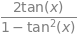

In [85]:
>>> expand_trig(tan(2*x))

In [86]:
>>> trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

In [87]:
>>> x, y = symbols('x y', positive=True)
>>> a, b = symbols('a b', real=True)
>>> z, t, c = symbols('z t c')

In [88]:
>>> sqrt(x) == x**Rational(1, 2)

True

In [89]:
>>> powsimp(x**a*x**b)

In [90]:
>>> powsimp(x**a*y**a)

In [91]:
>>> powsimp(t**c*z**c)

In [92]:
>>> powsimp(t**c*z**c, force=True)

In [93]:
>>> (z*t)**2

In [94]:
>>> sqrt(x*y)

In [95]:
>>> powsimp(z**2*t**2)

In [96]:
>>> powsimp(sqrt(x)*sqrt(y))

In [97]:
>>> expand_power_exp(x**(a + b))

In [98]:
>>> expand_power_base((x*y)**a)

In [99]:
>>> expand_power_base((z*t)**c)

In [100]:
>>> expand_power_base((z*t)**c, force=True)

In [101]:
>>> x**2*x**3

In [102]:
>>> expand_power_exp(x**5)

In [103]:
>>> powdenest((x**a)**b)

In [104]:
>>> powdenest((z**a)**b)

In [105]:
>>> powdenest((z**a)**b, force=True)

In [106]:
>>> ln(x)

Logarithms have similar issues as powers. There are two main identities

log(xy)=log(x)+log(y)
log(xn)=nlog(x)
Neither identity is true for arbitrary complex x and y, due to the branch cut in the complex plane for the complex logarithm. However, sufficient conditions for the identities to hold are if x and y are positive and n is real.

In [107]:
ln(x)

In [108]:
>>> x, y = symbols('x y', positive=True)
>>> n = symbols('n', real=True)

In [109]:
>>> expand_log(log(x*y))

In [110]:
>>> expand_log(log(x/y))

In [111]:
expand_log(log(x**2))

In [112]:
>>> expand_log(log(x**n))

In [113]:
>>> expand_log(log(z*t))

In [114]:
>>> expand_log(log(z**2))

In [115]:
>>> expand_log(log(z**2), force=True)

In [116]:
>>> logcombine(log(x) + log(y))

In [117]:
>>> logcombine(n*log(x))

In [118]:
>>> logcombine(n*log(z))

In [119]:
>>> logcombine(n*log(z), force=True)

In [120]:
>>> x, y, z = symbols('x y z')
>>> k, m, n = symbols('k m n')

In [121]:
>>> factorial(n)

The binomial coefficient function is binomial. binomial(n, k) represents (nk), the number of ways to choose k items from a set of n distinct items. It is also often written as nCk, and is pronounced “n choose k”.

In [122]:
>>> binomial(n, k)

The factorial function is closely related to the gamma function, gamma. gamma(z) represents $\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt$, which for positive integer z is the same as $(z−1)!$.

In [123]:
>>> gamma(z)

In [124]:
>>> hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

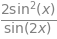

In [125]:
>>> tan(x).rewrite(sin)

In [126]:
>>> factorial(x).rewrite(gamma)

In [127]:
factorial(x)

In [128]:
>>> expand_func(gamma(x + 3))

In [129]:
>>> hyperexpand(hyper([1, 1], [2], z))

In [130]:
>>> expr = meijerg([[1],[1]], [[1],[]], -z)
>>> expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [131]:
>>> combsimp(factorial(n)/factorial(n - 3))

In [132]:
>>> combsimp(binomial(n+1, k+1)/binomial(n, k))

In [133]:
>>> combsimp(gamma(x)*gamma(1 - x))

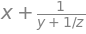

In [134]:
>>> def list_to_frac(l):
...     expr = Integer(0)
...     for i in reversed(l[1:]):
...         expr += i
...         expr = 1/expr
...     return l[0] + expr
>>> list_to_frac([x, y, z])

In [135]:
>>> list_to_frac([1, 2, 3, 4])

In [136]:
>>> syms = symbols('a0:5')
>>> syms

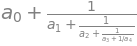

In [137]:
>>> a0, a1, a2, a3, a4 = syms
>>> frac = list_to_frac(syms)
>>> frac

In [138]:
>>> frac = cancel(frac)

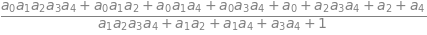

In [139]:
>>> frac

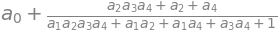

In [140]:
>>> l = []
>>> frac = apart(frac, a0)
>>> frac

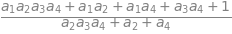

In [141]:
>>> l.append(a0)
>>> frac = 1/(frac - a0)
>>> frac

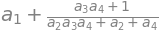

In [142]:
>>> frac = apart(frac, a1)
>>> frac

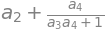

In [143]:
>>> l.append(a1)
>>> frac = 1/(frac - a1)
>>> frac = apart(frac, a2)
>>> frac

In [144]:
>>> l.append(a2)
>>> frac = 1/(frac - a2)
>>> frac = apart(frac, a3)
>>> frac

In [145]:
>>> l.append(a3)
>>> frac = 1/(frac - a3)
>>> frac = apart(frac, a4)
>>> frac

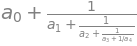

In [146]:
>>> l.append(a4)
>>> list_to_frac(l)

In [147]:
>>> import random
>>> l = list(symbols('a0:5'))
>>> random.shuffle(l)
>>> orig_frac = frac = cancel(list_to_frac(l))
>>> del l

In [148]:
>>> from sympy import *
>>> x, y, z = symbols('x y z')
>>> init_printing(use_unicode=True)

In [149]:
>>> diff(cos(x), x)

In [150]:
>>> diff(exp(x**2), x)

In [151]:
>>> diff(x**4, x, x, x)

In [152]:
>>> diff(x**4, x, 3)

In [153]:
>>> expr = exp(x*y*z)
>>> diff(expr, x, y, y, z, z, z, z)

In [154]:
>>> diff(expr, x, y, 2, z, 4)

In [155]:
>>> diff(expr, x, y, y, z, 4)

In [156]:
>>> expr.diff(x, y, y, z, 4)

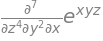

In [157]:
>>> deriv = Derivative(expr, x, y, y, z, 4)
>>> deriv

In [158]:
>>> deriv.doit()

In [159]:
>>> integrate(cos(x), x)

Quick Tip

$∞$ in SymPy is oo (that’s the lowercase letter “oh” twice). This is because oo looks like $∞$, and is easy to type.

To compute a definite integral, pass the argument (integration_variable, lower_limit, upper_limit). For example, to compute

$\int_0^\infty e^{-x}\,dx,$

we would do

In [160]:
>>> integrate(exp(-x), (x, 0, oo))

As with indefinite integrals, you can pass multiple limit tuples to perform a multiple integral. For example, to compute

$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy$,

do

In [161]:
>>> integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [162]:
oo

In [163]:
(0,oo)

In [164]:
>>> expr = integrate(x**x, x)
>>> print(expr)

Integral(x**x, x)


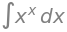

In [165]:
expr

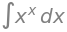

In [166]:
expr.doit()

In [167]:
>>> expr = integrate(x**2, x)
>>> print(expr)

x**3/3


In [168]:
expr

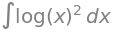

In [169]:
>>> expr = Integral(log(x)**2, x)
>>> expr

In [170]:
>>> expr.doit()

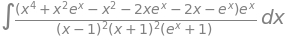

In [171]:
>>> integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x -
...     exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
>>> integ

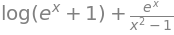

In [172]:
>>> integ.doit()

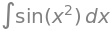

In [173]:
>>> integ = Integral(sin(x**2), x)
>>> integ

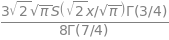

In [174]:
>>> integ.doit()

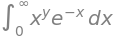

In [175]:
>>> integ = Integral(x**y*exp(-x), (x, 0, oo))
>>> integ

In [176]:
>>> integ.doit()

⎧ Γ(y + 1)    for re(y) > -1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

# Limits
SymPy can compute symbolic limits with the limit function. The syntax to compute

$\lim_{x\to x_0} f(x)$

is limit(f(x), x, x0).

In [177]:
>>> limit(sin(x)/x, x, 0)

In [178]:
>>> expr = x**2/exp(x)
>>> expr.subs(x, oo)

nan

In [179]:
>>> limit(expr, x, oo)

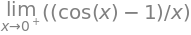

In [180]:
>>> expr = Limit((cos(x) - 1)/x, x, 0)
>>> expr

In [181]:
>>> expr.doit()

To evaluate a limit at one side only, pass $'+'$ or $'-'$ as a third argument to limit. For example, to compute

$\lim_{x\to 0^+}\frac{1}{x}$,

do

In [182]:
>>> limit(1/x, x, 0, '+')

In [183]:
>>> limit(1/x, x, 0, '-')

In [184]:
>>> expr = exp(sin(x))
>>> expr.series(x, 0, 4)

In [185]:
>>> x + x**3 + x**6 + O(x**4)

In [186]:
>>> x*O(1)

In [187]:
>>> expr.series(x, 0, 4).removeO()

In [188]:
>>> exp(x - 6).series(x, x0=6)

In [190]:
>>> f = Function('f')
>>> dfdx = f(x).diff(x)
>>> Derivative.as_finite_difference(dfdx)

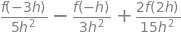

In [192]:
>>> f = Function('f')
>>> d2fdx2 = f(x).diff(x, 2)
>>> h = Symbol('h')
>>> Derivative.as_finite_difference(d2fdx2, [-3*h,-h,2*h])

In [193]:
finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1]

In [194]:
>>> x_list = [-3, 1, 2]
>>> y_list = symbols('a b c')
>>> apply_finite_diff(1, x_list, y_list, 0)